In [21]:
import pandas as pd
import numpy as np
import catboost as cbt
from sklearn.metrics import accuracy_score, roc_auc_score,log_loss
import gc
import math
import time
import datetime
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import warnings
import seaborn as sns
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from string import punctuation
from sklearn import svm
from sklearn.feature_extraction import stop_words

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from nltk import ngrams
from itertools import chain
from wordcloud import WordCloud
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from matplotlib.font_manager import FontProperties
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import warnings

font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)

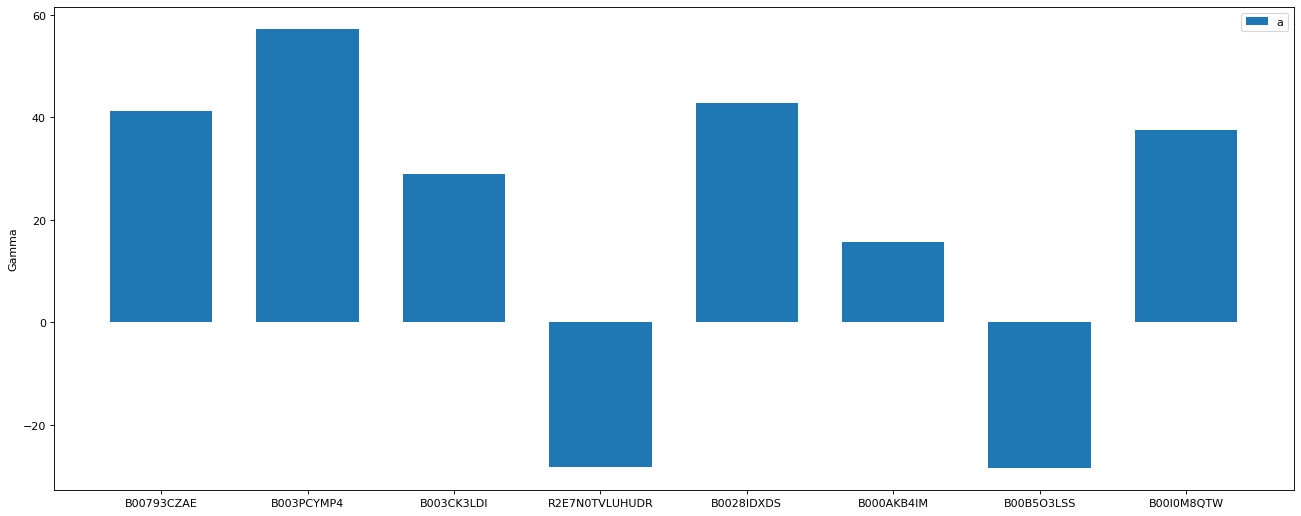

In [26]:
import matplotlib.pyplot as plt
import numpy as np

 # 生成画布
plt.figure(figsize=(20, 8), dpi=80)
 # 横坐标电影名字
movie_name = ['B00793CZAE','B003PCYMP4','B003CK3LDI','R2E7N0TVLUHUDR', 'B0028IDXDS', 'B000AKB4IM', 'B00B5O3LSS', 'B00I0M8QTW']
 # 纵坐标票房
y=[41.278,57.273,28.927,-28.183,42.751,15.650,-28.487,37.468]
x=range(len(movie_name))

plt.bar(x,y,width=0.7)
plt.xticks(x, movie_name)
plt.ylabel("Gamma")
plt.show()


# Exploratory Data Analysis

## 1.1导入数据

In [22]:
#数据导入
file_path = './Problem_C_Data/pacifier.tsv'
df = pd.read_csv(file_path, sep='\t', header=0)
df.head(30)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,40626522,R1A3ZUBR8TSAKY,B00793CZAE,572944212,"mary meyer wubbanub plush pacifier, lamb",Baby,5,0,0,N,Y,Love this!,Perfect match for the Gund Huggybuddy I bought...,8/31/2015
1,US,16290022,RLJNYBK4FGBYX,B003PCYMP4,911821018,wubbanub lamb infant pacifier,Baby,5,0,0,N,Y,Love 💕,My little girl love this paci contraption!,8/31/2015
2,US,10216509,R26QCW75C4JDOK,B003CK3LDI,392768822,wubbanub infant pacifier - giraffe,Baby,5,0,0,N,Y,Five Stars,My son loves this one and will only sleep if h...,8/31/2015
3,US,114040,R2E7N0TVLUHUDR,B003CK3LDI,392768822,wubbanub infant pacifier - giraffe,Baby,5,0,0,N,Y,Five Stars,Perfect,8/31/2015
4,US,27971579,R1SO9VMCIGZX3U,B003PCYMP4,911821018,wubbanub lamb infant pacifier,Baby,5,0,0,N,Y,Five Stars,Amazing addition to the nursery!,8/31/2015
5,US,36369192,R2EUVAGKYPV8Z3,B00PF841HA,449026476,"philips avent freeflow pacifier bpa, free blue...",Baby,5,0,0,N,Y,Five Stars,"Great, breathable, and basic pacifier.",8/31/2015
6,US,18742061,R2EC65V4U7R8FZ,B0082I1IA8,218693378,mam glow in the dark night orthodontic pacifie...,Baby,5,0,0,N,Y,Five Stars,Great pacifiers,8/31/2015
7,US,15312194,RG9XY3EKPUCL1,B00067AUNY,957640647,"dexbaby womb sounds bear audio pacifier, brown...",Baby,3,0,0,N,Y,Does the job,The bear does exactly what we ordered it to do...,8/31/2015
8,US,44791277,R1QR2VQN2KLU6Z,B003CK3LDI,392768822,wubbanub infant pacifier - giraffe,Baby,5,0,0,N,Y,"Kid loves it, so I do to.",Baby boy loves it and like to just hold the gi...,8/31/2015
9,US,2943530,R3PRYHYQE0TLYK,B00B7U61QO,115431579,nuk pack of 4 trendline orthodontic pacifier b...,Baby,5,0,0,N,Y,We love the NUK brand of bottles and pacifiers...,We love the NUK brand of bottles and pacifiers...,8/31/2015


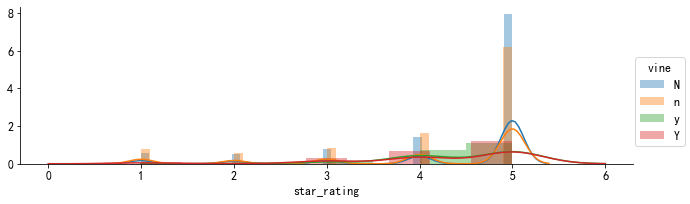

In [308]:
feature_name = ['star_rating']
for i in feature_name:
    sns.FacetGrid(data = df, hue='vine', aspect=3).map(sns.distplot, i).add_legend(); plt.show()

In [309]:
#coding:utf-8
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=True #用来正常显示负号

def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))


def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))


def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))


def plot_count(feature, title, df, size=1, num=20):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:num], palette='Set3')
    g.set_title("Number and percentage of {}".format(title), fontproperties=font)
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center", fontproperties=font) 
    plt.show() 

## 1.2统计表中的统计信息

In [310]:
# 缺失值
missing_data(df)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
Total,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
Percent,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0105602,0
Types,object,int64,object,object,int64,object,object,int64,int64,int64,object,object,object,object,object


In [311]:
# 不同的值
unique_values(df)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
Total,18939,18939,18939,18939,18939,18939,18939,18939,18939,18939,18939,18939,18939,18937,18939
Uniques,2,17661,18939,6482,5432,5533,2,5,76,79,4,4,12611,18085,1908


In [312]:
# 最频繁的值
most_frequent_values(df)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
Total,18939,18939,18939,18939,18939,18939,18939,18939,18939,18939,18939,18939,18939,18937,18939
Most frequent item,US,5196068,RZWDYRYVWZ95J,B003CK3LDI,246038397,"philips avent bpa free soothie pacifier, 0-3 m...",Baby,5,0,0,N,Y,Five Stars,good,7/6/2013
Frequence,11198,10,1,515,833,809,11198,12660,14972,13631,11126,9791,1875,72,214
Percent from total,59.127,0.053,0.005,2.719,4.398,4.272,59.127,66.846,79.054,71.973,58.747,51.698,9.9,0.38,1.13


## 1.3各类字段出现最多的前几个

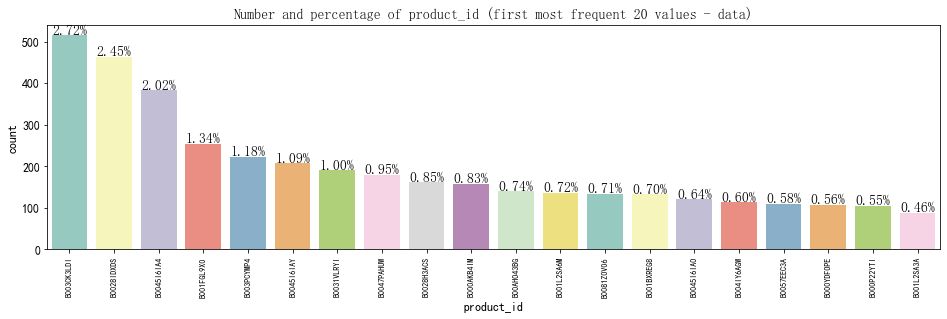

In [313]:
plot_count('product_id', 'product_id (first most frequent 20 values - data)', df, size=4)

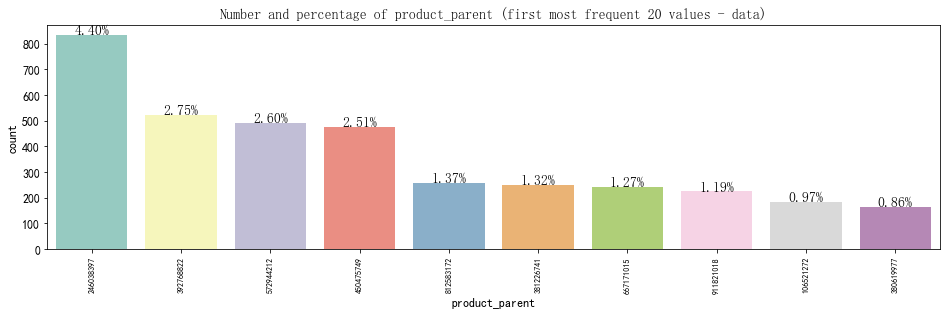

In [314]:
plot_count('product_parent', 'product_parent (first most frequent 20 values - data)', df, size=4,num = 10)

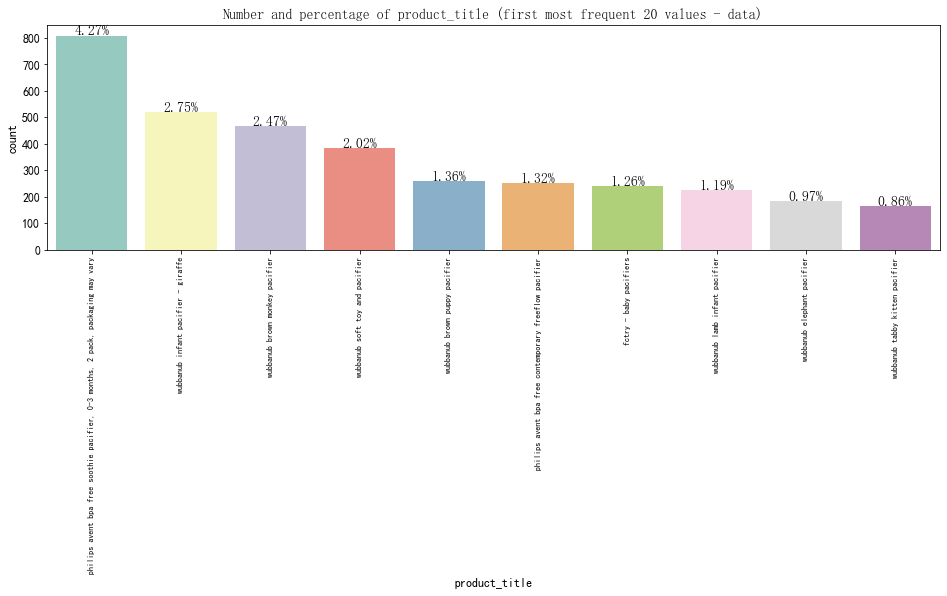

In [315]:
plot_count('product_title', 'product_title (first most frequent 20 values - data)', df, size = 4,num = 10)

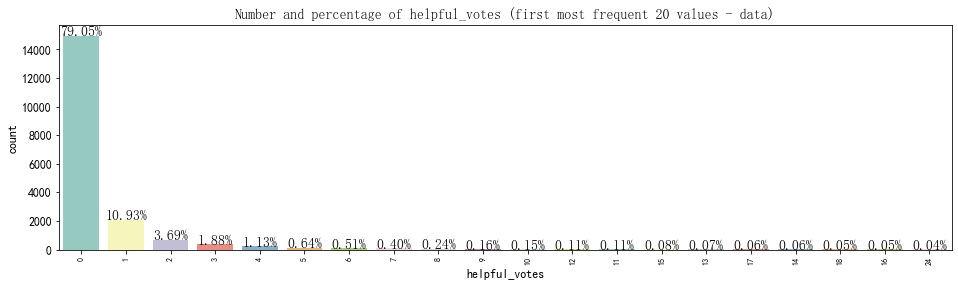

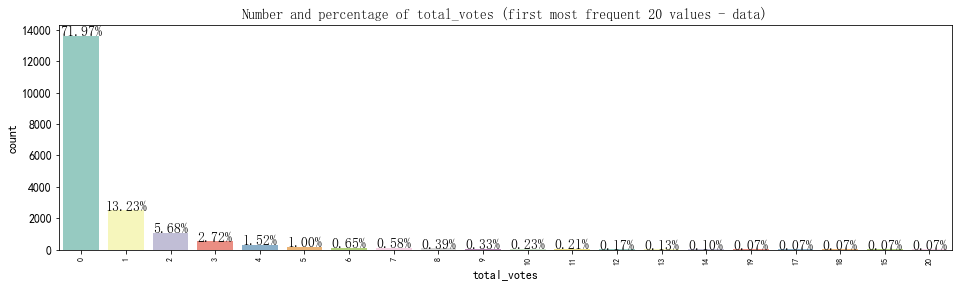

In [316]:
plot_count('helpful_votes', 'helpful_votes (first most frequent 20 values - data)', df, size = 4,num = 20)
plot_count('total_votes', 'total_votes (first most frequent 20 values - data)', df, size = 4,num = 20)

## 1.4查看投票字段的分布比例

## 1.5打分与投票支持率之间的关系

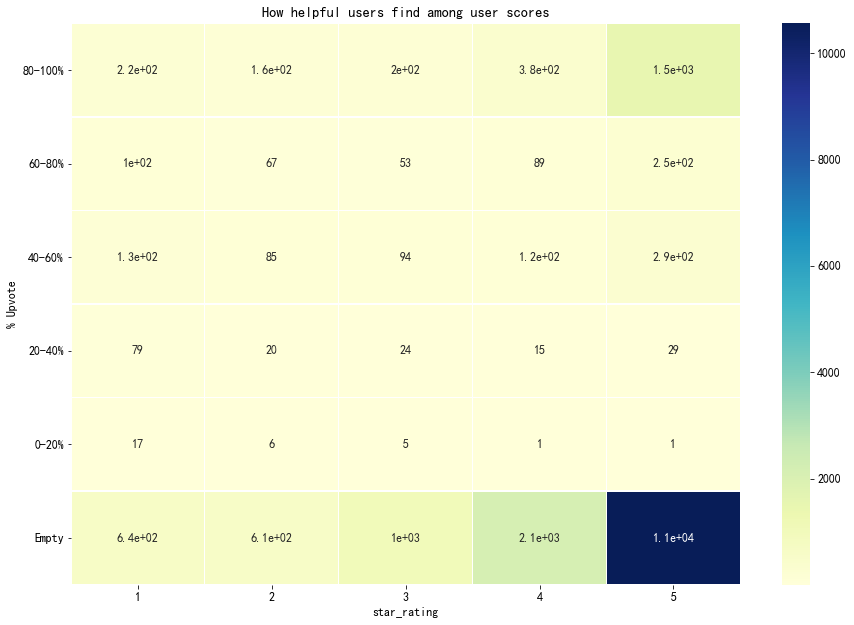

In [317]:
df['Helpful %'] = np.where(df['helpful_votes'] > 0, df['helpful_votes'] / df['total_votes'], -1)
df['% Upvote'] = pd.cut(df['Helpful %'], bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'], include_lowest = True)
df.head()

df_s = df.groupby(['star_rating', '% Upvote']).agg({'review_id': 'count'})
df_s = df_s.unstack()
df_s.columns = df_s.columns.get_level_values(1)
fig = plt.figure(figsize=(15,10))

sns.heatmap(df_s[df_s.columns[::-1]].T, cmap = 'YlGnBu', linewidths=.5, annot = True)
plt.yticks(rotation=0)
plt.title('How helpful users find among user scores')
plt.show()

**Key message from above:**

* Reviews are skewed towards positive
* More than half of the reviews are with zero votes
* Many people agree with score 5 reviews


# Sentimental analysis

## 1.1Text preprocessing
### Classifying text as postive and negative


In [318]:
senti = df[['review_id','star_rating' ,'review_headline', 'review_body', 'review_date','product_title']]

senti["senti"] = senti["star_rating"]>=4
senti["senti"] = senti["senti"].replace([True , False] , ["pos" , "neg"])

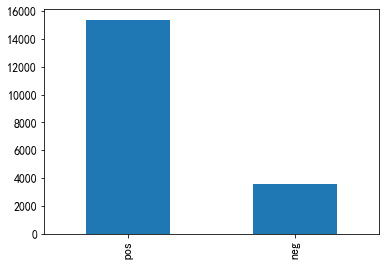

In [319]:
senti["senti"].value_counts().plot.bar()
plt.show()

### Cleaning text

In [320]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
import numpy as np
import re
import string
import nltk

cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    #sentence = " ".join(nltk.word_tokenize(sentence))
    return sentence

senti["Summary_Clean"] = senti["review_body"].apply(cleanup)
# check["Summary_Clean"] = check["reviews.text"].apply(cleanup)

In [321]:
split = senti[["Summary_Clean" , "senti", 'star_rating','review_date','product_title']]
train=split.sample(frac=0.8,random_state=200)
test=split.drop(train.index)

In [322]:
def word_feats(words):
    features = {}
    for word in words:
        features [word] = True
    return features

### (1)Feature Extracter for NLTK Naive bayes classifier¶

In [323]:
train["words"] = train["Summary_Clean"].str.lower().str.split()
test["words"] = test["Summary_Clean"].str.lower().str.split()

train.index = range(train.shape[0])
test.index = range(test.shape[0])
prediction =  {} ## For storing results of different classifiers

train_naive = []
test_naive = []

for i in range(train.shape[0]):
    train_naive = train_naive +[[word_feats(train["words"][i]) , train["senti"][i]]]
for i in range(test.shape[0]):
    test_naive = test_naive +[[word_feats(test["words"][i]) , test["senti"][i]]]


classifier = NaiveBayesClassifier.train(train_naive)
print("NLTK Naive bayes Accuracy : {}".format(nltk.classify.util.accuracy(classifier , test_naive)))
classifier.show_most_informative_features(5)

NLTK Naive bayes Accuracy : 0.5694297782470961
Most Informative Features
                  unsafe = True              neg : pos    =     33.4 : 1.0
                 assumed = True              neg : pos    =     33.4 : 1.0
                  poorly = True              neg : pos    =     30.5 : 1.0
          disappointment = True              neg : pos    =     23.5 : 1.0
              misleading = True              neg : pos    =     21.8 : 1.0


In [324]:
# predicting result of nltk classifier¶
y =[]
only_words= [test_naive[i][0] for i in range(test.shape[0])]
for i in range(test.shape[0]):
    y = y + [classifier.classify(only_words[i] )]
prediction["Naive"]= np.asarray(y)

### Now we are bulding Countvector and Tfidf vector for train , test ,check data

In [325]:
from wordcloud import STOPWORDS

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
stopwords = set(STOPWORDS)
stopwords.remove("not")

count_vect = CountVectorizer(min_df=2 ,stop_words=stopwords , ngram_range=(1,2))
tfidf_transformer = TfidfTransformer()

X_train_counts = count_vect.fit_transform(train["Summary_Clean"])        
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


X_new_counts = count_vect.transform(test["Summary_Clean"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)


In [326]:
# Fitiing Multinomial NB
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB().fit(X_train_tfidf , train["senti"])
test['pro_Multinomial'] = model1.predict_proba(X_test_tfidf)[:,1]
print("Multinomial Accuracy : {}".format(model1.score(X_test_tfidf , test["senti"])))

Multinomial Accuracy : 0.808870116156283


In [327]:
# Fitiing Bernouli NB
from sklearn.naive_bayes import BernoulliNB
model2 = BernoulliNB().fit(X_train_tfidf,train["senti"])
test['pro_Bernoulli'] = model2.predict_proba(X_test_tfidf)[:,1]
print("Bernoulli Accuracy : {}".format(model2.score(X_test_tfidf , test["senti"])))

Bernoulli Accuracy : 0.8154699049630412


In [328]:
# Fitiing LogisticRegression
from sklearn import linear_model
logreg = linear_model.LogisticRegression(solver='lbfgs' , C=1000)
logistic = logreg.fit(X_train_tfidf, train["senti"])
test['pro_LogisticRegression'] = logreg.predict_proba(X_test_tfidf)[:,1]
print("Logistic Regression Accuracy : {}".format(logreg.score(X_test_tfidf , test["senti"])))

Logistic Regression Accuracy : 0.8780359028511088


### Getting most occuring words in train set

In [329]:
words = count_vect.get_feature_names()
feature_coefs = pd.DataFrame(
    data = list(zip(words, logistic.coef_[0])),
    columns = ['feature', 'coef'])
feature_coefs.sort_values(by="coef")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


### Lets find out which classifier is doing what

No handles with labels found to put in legend.


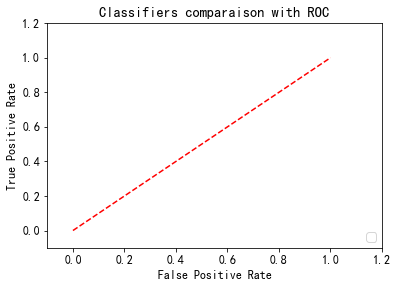

In [330]:
from sklearn.metrics import roc_curve, auc


def formatt(x):
    if x == 'neg':
        return 0
    if x == 0:
        return 0
    return 1
vfunc = np.vectorize(formatt)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
for model, predicted in prediction.items():
    if model not in 'Naive':
        false_positive_rate, true_positive_rate, thresholds = roc_curve(test["senti"].map(vfunc), predicted)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
        cmp += 1

plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [331]:
from numpy import array, zeros, argmin, inf, equal, ndim
from scipy.spatial.distance import cdist
import pandas as pd


def dtw(x, y, dist):
    """
    Computes Dynamic Time Warping (DTW) of two sequences.
    :param array x: N1*M array
    :param array y: N2*M array
    :param func dist: distance used as cost measure
    Returns the minimum distance, the cost matrix, the accumulated cost matrix, and the wrap path.
    """
    assert len(x)
    assert len(y)
    r, c = len(x), len(y)
    D0 = zeros((r + 1, c + 1))
    D0[0, 1:] = inf
    D0[1:, 0] = inf
    D1 = D0[1:, 1:]  # view
    for i in range(r):
        for j in range(c):
            D1[i, j] = dist(x[i], y[j])
    C = D1.copy()
    for i in range(r):
        for j in range(c):
            D1[i, j] += min(D0[i, j], D0[i, j + 1], D0[i + 1, j])
    if len(x) == 1:
        path = zeros(len(y)), range(len(y))
    elif len(y) == 1:
        path = range(len(x)), zeros(len(x))
    else:
        path = _traceback(D0)
    return D1[-1, -1] / sum(D1.shape), C, D1, path


def _traceback(D):
    i, j = array(D.shape) - 2
    p, q = [i], [j]
    while ((i > 0) or (j > 0)):
        tb = argmin((D[i, j], D[i, j + 1], D[i + 1, j]))
        if (tb == 0):
            i -= 1
            j -= 1
        elif (tb == 1):
            i -= 1
        else:  # (tb == 2):
            j -= 1
        p.insert(0, i)
        q.insert(0, j)
    return array(p), array(q)


def dist_for_float(p1, p2):
    dist = 0.0
    elem_type = type(p1)
    if  elem_type == float or elem_type == int :
        dist = float(abs(p1 - p2))
    else :
        sumval = 0.0
        for i in range(len(p1)) :
            sumval += pow(p1[i] - p2[i], 2)
        dist = pow(sumval, 0.5)
    return dist

In [336]:
title = test['product_title'].value_counts().index[1]
title

'wubbanub infant pacifier - giraffe'

In [337]:
s1 = list(test['star_rating'][test['product_title'] == title]/5)
s2 = list(test['pro_Bernoulli']+test['pro_Multinomial']+test['pro_LogisticRegression']/3)
dis, _, _, _ = dtw(s1, s2, dist_for_float)
print(dis)

1.1019049807288024


In [ ]:
train['pro_Bernoulli'] = model2.predict_proba(X_train_tfidf)[:,1]
train['pro_Multinomial'] = model1.predict_proba(X_train_tfidf)[:,1]
train['pro_LogisticRegression'] = logreg.predict_proba(X_train_tfidf)[:,1]

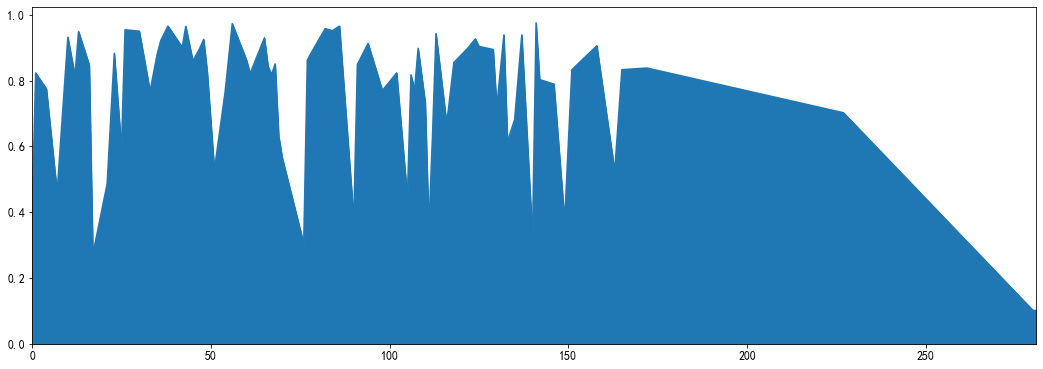

In [179]:
test['temp'] = test.review_date.apply(lambda x : pd.to_datetime(x))
kindle_review_dates = test['pro_Multinomial'][test['product_title'] == title]
kindle_review_dates.sort_index(inplace=True)
kindle_review_dates.plot(kind='area',figsize=(18,6))
plt.show()

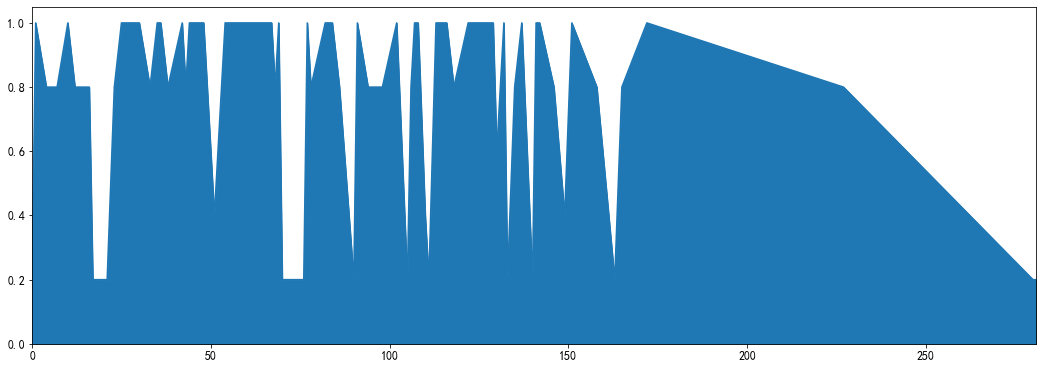

In [180]:
test['temp'] = test.review_date.apply(lambda x : pd.to_datetime(x))
kindle_review_dates = test['star_rating'][test['product_title'] == title] /5
kindle_review_dates.sort_index(inplace=True)
kindle_review_dates.plot(kind='area',figsize=(18,6))
plt.show()

In [182]:
test_dtw = pd.DataFrame()
test_dtw['pro_Multinomial'] = test['pro_Multinomial'][test['product_title'] == title]
test_dtw['pro_Bernoulli'] = test['pro_Bernoulli'][test['product_title'] == title]
test_dtw['pro_LogisticRegression'] = test['pro_LogisticRegression'][test['product_title'] == title]
test_dtw['star_rating'] = test['star_rating'][test['product_title'] == title] /5
test_dtw['avg'] = (test_dtw['pro_Multinomial'] + test_dtw['pro_Bernoulli'] +test_dtw['pro_LogisticRegression'])/3
test_dtw.head()

,pro_Multinomial,pro_Bernoulli,pro_LogisticRegression,star_rating,avg
0,0.390086,9.999343e-01,0.003641,0.2,0.464554
1,0.823402,1.000000e+00,0.248919,1.0,0.690774
4,0.774947,5.635405e-08,0.752649,0.8,0.509198
7,0.460827,1.647353e-16,0.754085,0.8,0.404970
10,0.931651,1.000000e+00,0.999996,1.0,0.977216


In [185]:
test_dtw.to_csv('test_dtw.csv')